<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/hpdp/HANY/case_study1/cs1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Covid-19 Hospitalization and Healthcare Capacity in Malaysia

The dataset is about COVID-19 in Malaysia and includes information related to the epidemic, particularly in hospitals. It contains details such as the date, state, the number of people admitted due to COVID-19, the number of individuals receiving intensive care, and the availability of COVID-19 dedicated beds. This data provides insights into the spread of the virus, healthcare utilization, and the capacity of hospitals to manage COVID-19 cases over time and across different regions in Malaysia.

**Group Members:**
1. LIEW YVONNE A21EC0045
2. MUHAMMAD HARITH HAKIM BIN OTHMAN A21EC0205
3. NADIA SYAFIQAH BINTI ZULKIPLI	A21EC0098
4. ALYA BALQISS BINTI AZAHAR	A21EC0158

##Metadata (Variables & Methodology)
1) `date`: yyyy-mm-dd format; data correct as of 2359hrs on that date
<br>
2) `state`: name of state, with similar qualification on exhaustiveness of date-state combos as PKRC data
<br>
3) `beds`: total hospital beds (with related medical infrastructure)
<br>
4) `beds_covid`: total beds dedicated for COVID-19
<br>
5) `beds_noncrit`: total hospital beds for non-critical care
<br>
6) `admitted_x`: number of individuals in category `x` admitted to hospitals, where `x` can be suspected/probable, COVID-19 positive, or non-COVID
<br>
7) `discharged_x`: number of individuals in category `x` discharged from hospitals
<br>
8) `hosp_x`: total number of individuals in category `x` in hospitals; this is a stock variable altered by flows from admissions and discharges

##Data Preparation and Cleaning

1. Load the dataset into a data frame using Pandas using the url of the dataset.
2. Matplotlib and Seaborn are imported to plot graphs.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = "https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/hospital.csv"
df = pd.read_csv(data)

2. Use **head()** to read the first 5 data of the dataset.

In [ ]:
df.head()

,date,state,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid
0,2020-03-24,Johor,1440,434,1408,0,0,0,0,0,0,18,9,1
1,2020-03-24,Kedah,1218,143,1183,0,0,0,0,0,0,46,5,12
2,2020-03-24,Kelantan,1463,280,1424,9,6,15,1,0,1,78,58,23
3,2020-03-24,Melaka,1091,82,1065,0,0,0,0,0,0,19,10,12
4,2020-03-24,Negeri Sembilan,1223,253,1205,0,0,0,0,0,0,90,13,8


3. Use **info()** to print a short summary of the dataframe.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20723 entries, 0 to 20722
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              20723 non-null  object
 1   state             20723 non-null  object
 2   beds              20723 non-null  int64 
 3   beds_covid        20723 non-null  int64 
 4   beds_noncrit      20723 non-null  int64 
 5   admitted_pui      20723 non-null  int64 
 6   admitted_covid    20723 non-null  int64 
 7   admitted_total    20723 non-null  int64 
 8   discharged_pui    20723 non-null  int64 
 9   discharged_covid  20723 non-null  int64 
 10  discharged_total  20723 non-null  int64 
 11  hosp_covid        20723 non-null  int64 
 12  hosp_pui          20723 non-null  int64 
 13  hosp_noncovid     20723 non-null  int64 
dtypes: int64(12), object(2)
memory usage: 2.2+ MB


4. Find the number of rows & columns



In [ ]:
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 20723
Number of columns: 14


5. Drop missing values.


In [ ]:
df = df.dropna()
df

,date,state,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid
0,2020-03-24,Johor,1440,434,1408,0,0,0,0,0,0,18,9,1
1,2020-03-24,Kedah,1218,143,1183,0,0,0,0,0,0,46,5,12
2,2020-03-24,Kelantan,1463,280,1424,9,6,15,1,0,1,78,58,23
3,2020-03-24,Melaka,1091,82,1065,0,0,0,0,0,0,19,10,12
4,2020-03-24,Negeri Sembilan,1223,253,1205,0,0,0,0,0,0,90,13,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20718,2023-11-04,Selangor,3038,276,2968,5,2,7,6,4,10,8,3,1580
20719,2023-11-04,Terengganu,1582,298,1548,0,2,2,0,2,2,4,1,1199
20720,2023-11-04,W.P. Kuala Lumpur,2105,54,2066,2,0,2,0,3,3,3,3,1720
20721,2023-11-04,W.P. Labuan,122,3,116,0,0,0,0,0,0,0,0,0


According to the output, the number of rows remain the same after removing missing value, which is 20723. Therefore, there is no missing values in this dataset.

6. Change the type of date from 'object' to 'datetime'.

In [71]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.dtypes

date                datetime64[ns]
state                       object
beds                         int64
beds_covid                   int64
beds_noncrit                 int64
admitted_pui                 int64
admitted_covid               int64
admitted_total               int64
discharged_pui               int64
discharged_covid             int64
discharged_total             int64
hosp_covid                   int64
hosp_pui                     int64
hosp_noncovid                int64
dtype: object

##Perform exploratory analysis & visualization

* Sum of all numeric columns

In [ ]:
sum = df.sum(numeric_only=True)
sum

beds                47939233
beds_covid           9634192
beds_noncrit        46146811
admitted_pui          312651
admitted_covid        605221
admitted_total        917872
discharged_pui        242638
discharged_covid      515297
discharged_total      757935
hosp_covid           3187411
hosp_pui              701686
hosp_noncovid       27699042
dtype: int64

* Mean of all numeric columns

In [ ]:
mean = df.mean(numeric_only=True)
mean

beds                2313.334604
beds_covid           464.903344
beds_noncrit        2226.840274
admitted_pui          15.087150
admitted_covid        29.205279
admitted_total        44.292429
discharged_pui        11.708633
discharged_covid      24.865946
discharged_total      36.574579
hosp_covid           153.810307
hosp_pui              33.860252
hosp_noncovid       1336.632823
dtype: float64

* Min value of all numeric columns

In [58]:
min_values = df.min(numeric_only=True)

min_values

beds                122
beds_covid            0
beds_noncrit         95
admitted_pui          0
admitted_covid        0
admitted_total        0
discharged_pui        0
discharged_covid      0
discharged_total      0
hosp_covid            0
hosp_pui              0
hosp_noncovid         0
dtype: int64

* Max value of all numeric columns

In [59]:
max_values = df.max(numeric_only=True)
max_values

beds                 6568
beds_covid           4713
beds_noncrit         6224
admitted_pui          451
admitted_covid        789
admitted_total        914
discharged_pui        236
discharged_covid      658
discharged_total      732
hosp_covid           4218
hosp_pui              874
hosp_noncovid       13131
dtype: int64

* Median of all numeric columns

In [ ]:
median_values = df.median(numeric_only=True)
median_values

beds                2066.0
beds_covid           332.0
beds_noncrit        1969.0
admitted_pui           2.0
admitted_covid         7.0
admitted_total        13.0
discharged_pui         2.0
discharged_covid       6.0
discharged_total      11.0
hosp_covid            37.0
hosp_pui               5.0
hosp_noncovid       1133.0
dtype: float64

* First quantile of all numeric columns

In [ ]:
q1 = df.quantile(0.25, numeric_only=True)
q1

beds                1232.0
beds_covid           119.0
beds_noncrit        1205.0
admitted_pui           0.0
admitted_covid         1.0
admitted_total         2.0
discharged_pui         0.0
discharged_covid       1.0
discharged_total       2.0
hosp_covid             6.0
hosp_pui               1.0
hosp_noncovid        672.0
Name: 0.25, dtype: float64

* Third quantile of all numeric columns

In [ ]:
q3 = df.quantile(0.75, numeric_only=True)
q3

beds                3336.0
beds_covid           651.0
beds_noncrit        3189.0
admitted_pui          12.0
admitted_covid        29.0
admitted_total        45.0
discharged_pui        10.0
discharged_covid      24.0
discharged_total      38.0
hosp_covid           167.0
hosp_pui              32.0
hosp_noncovid       1904.0
Name: 0.75, dtype: float64

* Total number of beds dedicated for Covid-19 according to states

In [17]:
state_covid = df.groupby(['state'])['beds_covid'].sum()
state_covid

state
Johor                1234698
Kedah                 625382
Kelantan              564605
Melaka                330160
Negeri Sembilan       604280
Pahang                527436
Perak                 609330
Perlis                 90241
Pulau Pinang          305702
Sabah                1229553
Sarawak               933246
Selangor             1405747
Terengganu            476692
W.P. Kuala Lumpur     567547
W.P. Labuan            56042
W.P. Putrajaya         73531
Name: beds_covid, dtype: int64

* Total number of individuals with Covid-19 positive admitted to hospitals according to date in descending order

In [22]:
date_covid = df.groupby(['date'])['admitted_covid'].sum()
date_covid.sort_values(ascending = False)

date
2021-08-06    2695
2021-08-10    2595
2021-08-11    2473
2021-08-18    2458
2021-08-04    2420
              ... 
2020-07-09       1
2020-08-03       1
2020-06-26       1
2020-06-30       1
2020-07-02       1
Name: admitted_covid, Length: 1321, dtype: int64

* Statistic for Johor

In [14]:
johor_state = df[(df['state'] == 'Johor')]
johor_state.describe().apply(lambda x: round(x, 2))

,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid
count,1321.00,1321.00,1321.00,1321.00,1321.00,1321.00,1321.00,1321.00,1321.00,1321.00,1321.00,1321.00
mean,4062.65,934.67,3943.91,49.41,54.71,104.13,32.95,43.84,76.79,334.34,71.08,2275.43
std,905.48,716.44,883.65,56.49,73.44,117.17,36.91,59.71,88.46,474.57,81.13,1326.10
min,1426.00,42.00,1353.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,3492.00,421.00,3356.00,1.00,4.00,7.00,1.00,4.00,7.00,27.00,4.00,377.00
50%,4175.00,586.00,4061.00,13.00,25.00,56.00,11.00,19.00,40.00,125.00,32.00,2903.00
75%,5112.00,1290.00,4938.00,101.00,73.00,174.00,66.00,55.00,124.00,445.00,130.00,3183.00
max,5307.00,2753.00,5193.00,234.00,421.00,538.00,159.00,366.00,441.00,2320.00,430.00,13131.00


* Histograms for statistical analysis using data columns specific to Johor

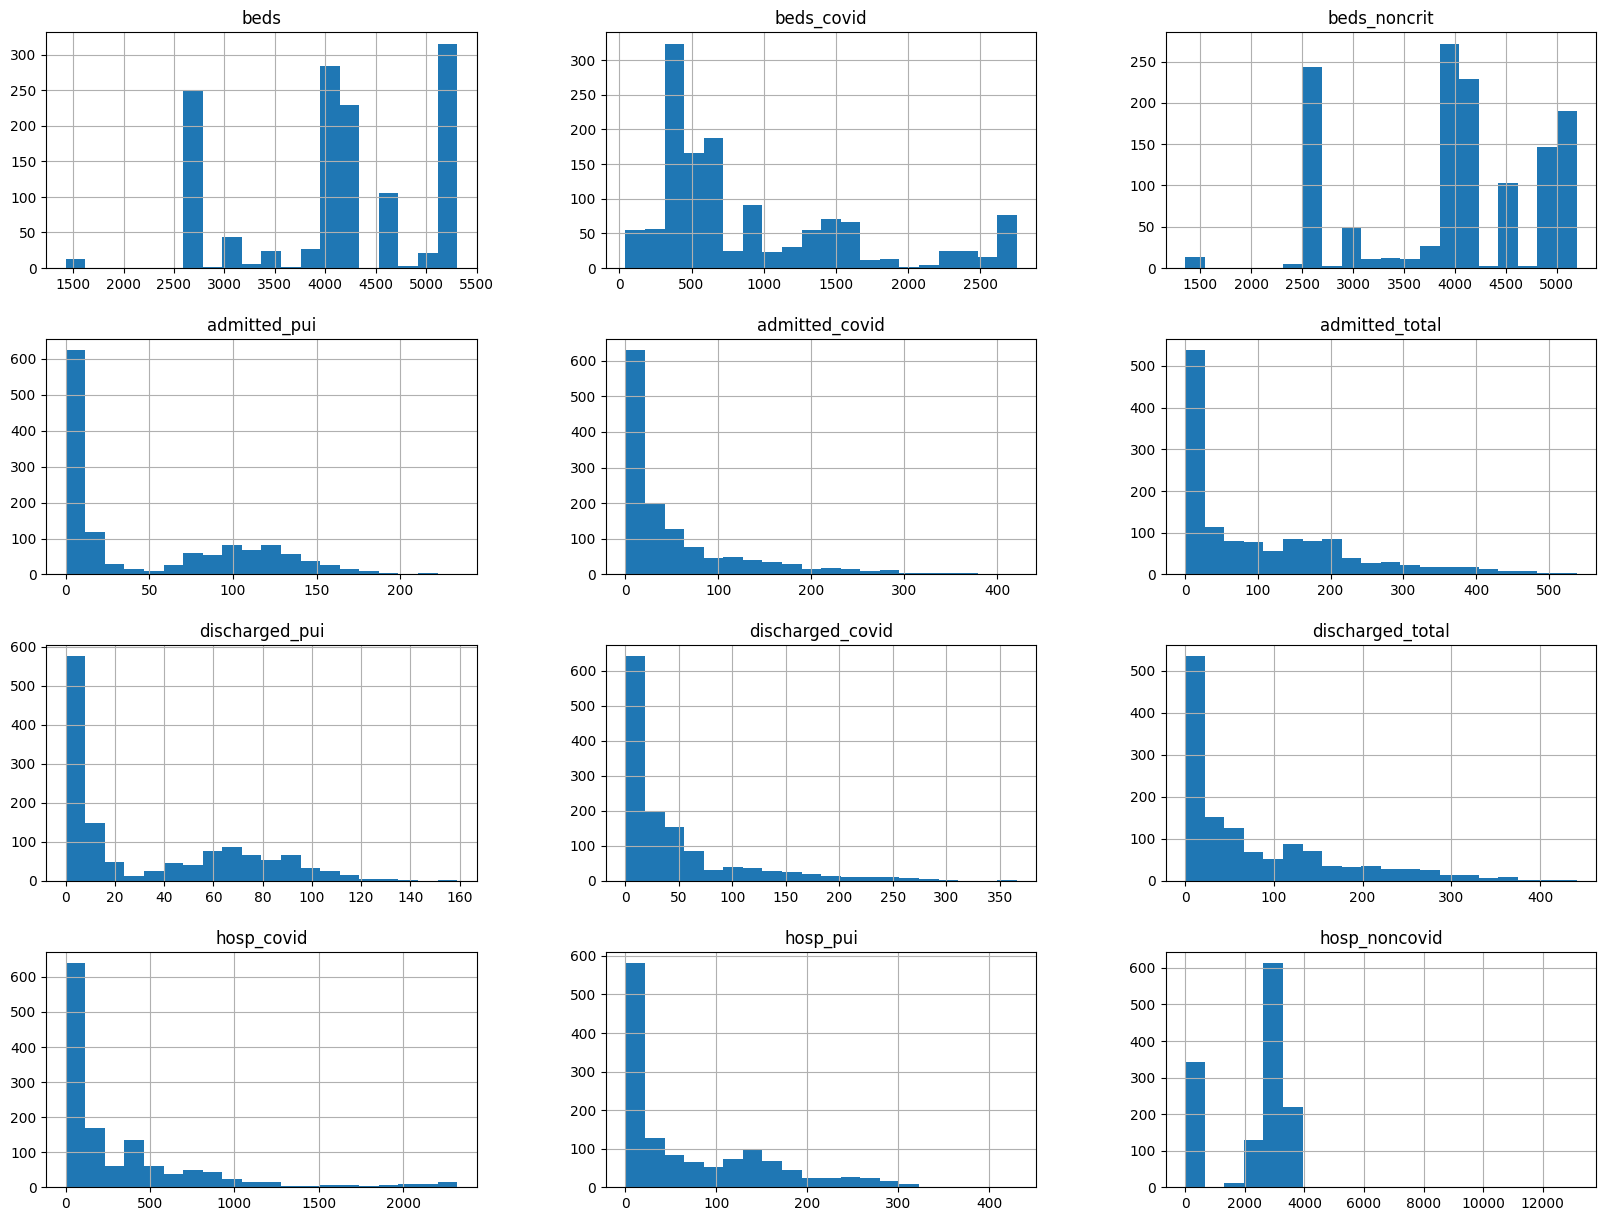

In [15]:
johor_state.hist(bins = 20, figsize = (20,15))
plt.show()

* Scatter plot between beds and beds_covid

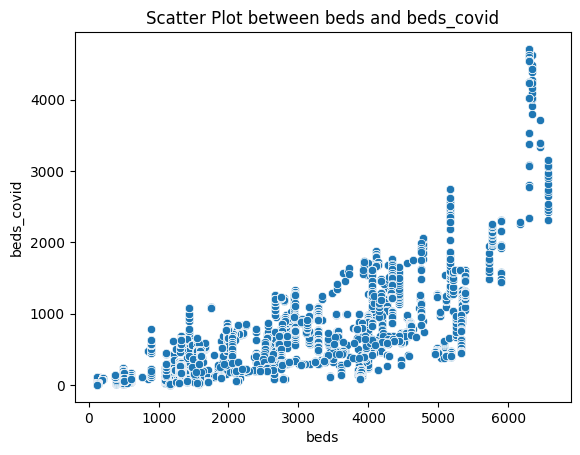

In [36]:
sns.scatterplot(data = df, x='beds', y='beds_covid')
plt.title('Scatter Plot between beds and beds_covid')
plt.xlabel('beds')
plt.ylabel('beds_covid')
plt.show()

* Summary of data

In [ ]:
summary_stats = df.describe()
summary_stats

,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid
count,20723.000000,20723.000000,20723.000000,20723.00000,20723.000000,20723.000000,20723.000000,20723.000000,20723.000000,20723.000000,20723.000000,20723.000000
mean,2313.334604,464.903344,2226.840274,15.08715,29.205279,44.292429,11.708633,24.865946,36.574579,153.810307,33.860252,1336.632823
std,1492.546350,488.465928,1444.369935,32.70343,60.094872,83.418383,24.162450,53.015123,69.643538,310.838063,69.877084,935.068504
min,122.000000,0.000000,95.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1232.000000,119.000000,1205.000000,0.00000,1.000000,2.000000,0.000000,1.000000,2.000000,6.000000,1.000000,672.000000
50%,2066.000000,332.000000,1969.000000,2.00000,7.000000,13.000000,2.000000,6.000000,11.000000,37.000000,5.000000,1133.000000
75%,3336.000000,651.000000,3189.000000,12.00000,29.000000,45.000000,10.000000,24.000000,38.000000,167.000000,32.000000,1904.000000
max,6568.000000,4713.000000,6224.000000,451.00000,789.000000,914.000000,236.000000,658.000000,732.000000,4218.000000,874.000000,13131.000000


##Asking & answering questions about the data

###Q1: What are the dates with the top 10 highest total number of admitted COVID-19 cases?

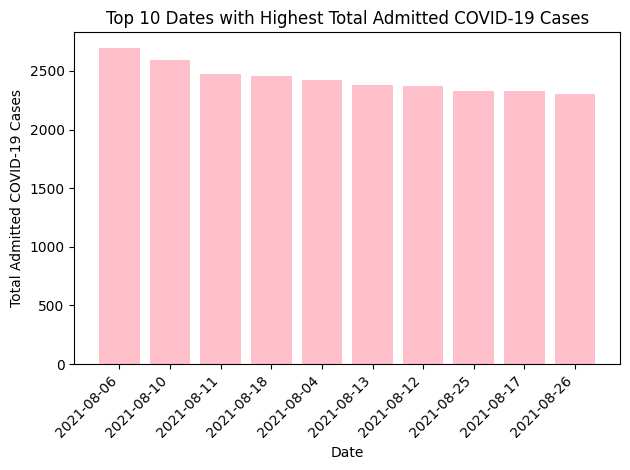

In [65]:
date_covid = df.groupby(['date'])['admitted_covid'].sum()
date_covid_sorted = date_covid.sort_values(ascending = False)
top_10_dates = date_covid_sorted.head(10)

plt.bar(top_10_dates.index, top_10_dates.values, color='pink')
plt.xlabel('Date')
plt.ylabel('Total Admitted COVID-19 Cases')
plt.title('Top 10 Dates with Highest Total Admitted COVID-19 Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

**Answer:** The date with the highest total number of admitted COVID-19 cases is 2021-08-06, followed by 2021-08-10. Subsequent dates with high case counts include 2021-08-11, 2021-08-18, 2021-08-04, 2021-08-12, 2021-08-25, 2021-08-17, and finally, 2021-08-26.

###Q2: What are the dates with the top 10 least total number of admitted COVID-19 cases?

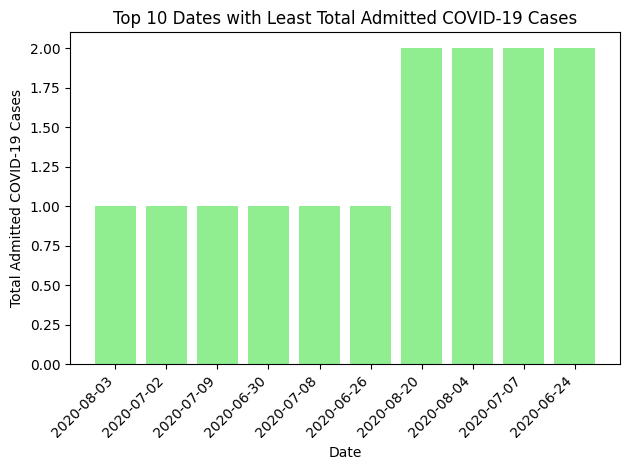

In [66]:
date_covid = df.groupby(['date'])['admitted_covid'].sum()
date_covid_sorted = date_covid.sort_values(ascending = True)
top_10_dates = date_covid_sorted.head(10)

plt.bar(top_10_dates.index, top_10_dates.values, color='lightgreen')
plt.xlabel('Date')
plt.ylabel('Total Admitted COVID-19 Cases')
plt.title('Top 10 Dates with Least Total Admitted COVID-19 Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

**Answer:** The dates with the least total number admitted Covid-19 cases are 2020-08-03, 2020-07-02, 2020-07-09, 2020-06-30, 2020-07-08, and 2020-06-26. These days have the same number of admitted Covid-19 cases, which is 1 person. Followed by 2020-08-20, 2020-08-04, 2020-07-07, and 2020-06-24, with the total number of 2 admitted Covid-19 cases.


###Q3: Which state has the highest and lowest total number of Covid-19 cases?

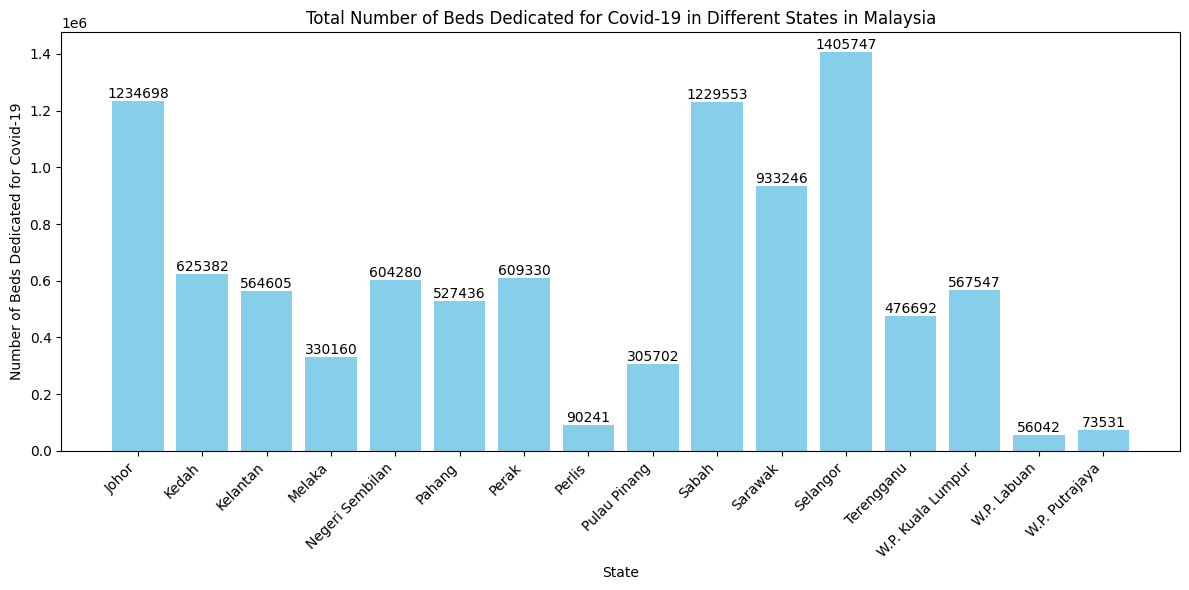

In [82]:
state_cases = df.groupby('state')['beds_covid'].sum().reset_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(state_cases['state'], state_cases['beds_covid'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Beds Dedicated for Covid-19')
plt.title('Total Number of Beds Dedicated for Covid-19 in Different States in Malaysia')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.tight_layout()

**Answer:** According to the bar chart, Selangor has the highest number of beds dedicated for Covid-19, with the number of 1405747 beds. Labuan has 56042 beds, which is the lowest in Malaysia.

###Q4: Among COVID-19 cases distributed among different states, which state has the highest percentage of Covid-19 beds?

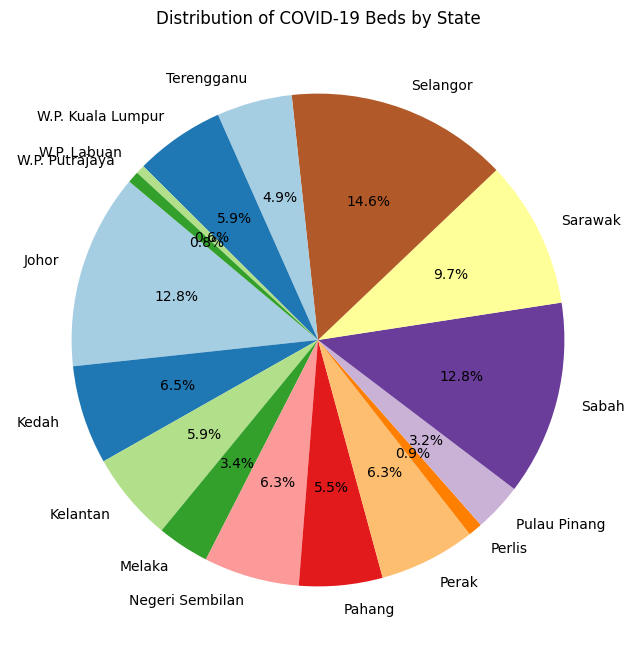

In [21]:
plt.figure(figsize=(10, 8))
plt.pie(state_covid, labels=state_covid.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of COVID-19 by State')
plt.show()

**Answer:** Selangor has the highest percentage of Covid-19 beds among all states in Malaysia.

###Q5: What are the top 5 the highest numbers of admitted COVID-19 cases in Johor?

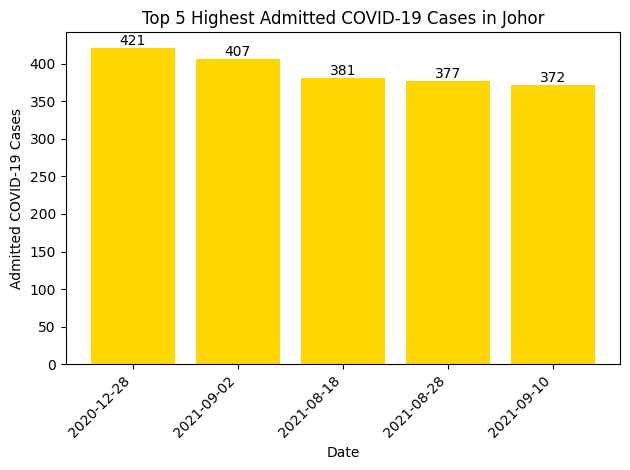

In [77]:
johor_state_covid = johor_state.groupby('date')['admitted_covid'].sum()

top_5_dates_johor = johor_state_covid.nlargest(5)

bars = plt.bar(top_5_dates_johor.index, top_5_dates_johor.values, color='gold')
plt.xlabel('Date')
plt.ylabel('Admitted COVID-19 Cases')
plt.title('Top 5 Highest Admitted COVID-19 Cases in Johor')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Answer:** The highest number of admitted COVID-19 cases in Johor occurred in 2020, reaching a peak of 421 cases. Subsequent notable figures in 2021 include 407, 381, 377, and 372 cases.

###Q6: How do the top 5 dates with the highest number of admitted COVID-19 cases in Johor compare with the corresponding dates in Perlis?

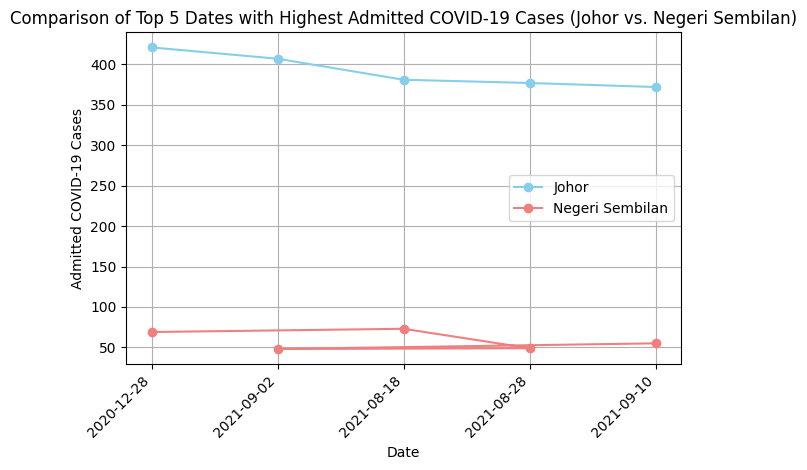

In [41]:
johor_data = df[df['state'] == 'Johor']
NS_data = df[df['state'] == 'Negeri Sembilan']

johor_date_covid = johor_data.groupby('date')['admitted_covid'].sum().nlargest(5)

NS_data_top_dates = NS_data[NS_data['date'].isin(top_5_dates_johor.index)]

plt.plot(top_5_dates_johor.index, top_5_dates_johor.values, marker='o', label='Johor', color='skyblue')
plt.plot(NS_data_top_dates['date'], NS_data_top_dates['admitted_covid'], marker='o', label='Negeri Sembilan', color='lightcoral')

plt.xlabel('Date')
plt.ylabel('Admitted COVID-19 Cases')
plt.title('Comparison of Top 5 Dates with Highest Admitted COVID-19 Cases (Johor vs. Negeri Sembilan)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

**Answer:** Negeri Sembilan recorded a comparatively lower number of admitted Covid-19 cases on the same dates as the top 5 highest cases in Johor.

###Q7: What are the top 5 states with the highest of Covid-19 individuals

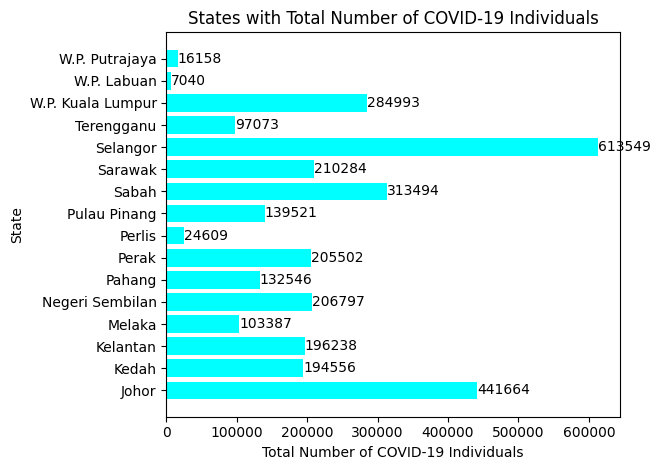

In [80]:
state_hosp = df.groupby('state')['hosp_covid'].sum()

bars = plt.barh(state_hosp.index, state_hosp.values, color='cyan')
plt.xlabel('Total Number of COVID-19 Individuals')
plt.ylabel('State')
plt.title('States with Total Number of COVID-19 Individuals')
plt.tight_layout()

for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval), va='center', ha='left')

plt.show()

**Answer:** Selangor has the highest total number of Covid-19 cases, reporting 613,549 cases. Following closely is Johor with 441,664 cases, trailed by Sabah with 313,494 cases, Kuala Lumpur with 284,993 cases, and Sarawak with 210,284 cases.

###Q8: What is the overall trend in the number of COVID-19 cases over time?

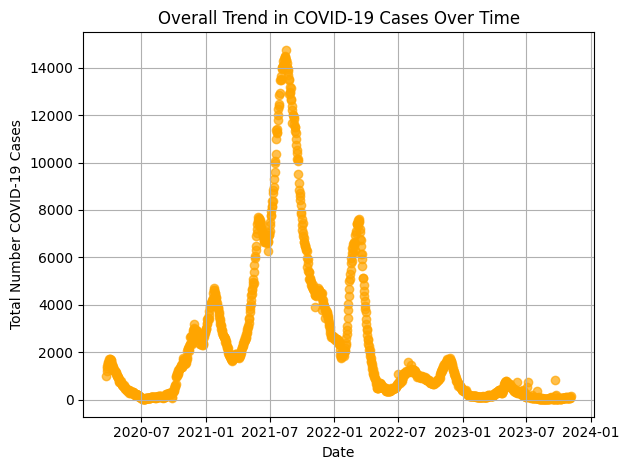

In [92]:
total_admitted_cases_over_time = df.groupby([df['date'].dt.year, df['date'].dt.month])['hosp_covid'].sum()

total_admitted_cases_over_time = df.groupby('date')['hosp_covid'].sum()

plt.scatter(total_admitted_cases_over_time.index, total_admitted_cases_over_time.values, color='orange', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Total Number COVID-19 Cases')
plt.title('Overall Trend in COVID-19 Cases Over Time')
plt.grid(True)
plt.tight_layout()

plt.show()

**Answer:** In the initial stages, Covid-19 was effectively controlled. However, post-July 2021, the cases surged to their highest peak, then is reduced for a moment. Following another brief respite, there was a renewed peak in cases after January 2022.

###Q9: Any correlation or pattern between the number of COVID-19 cases and the availability of beds in hospitals?

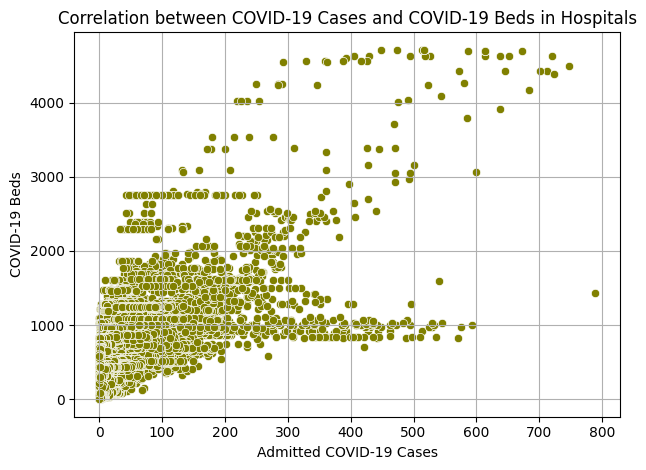

In [55]:
sns.scatterplot(x='admitted_covid', y='beds_covid', data=df, color='olive')
plt.xlabel('Admitted COVID-19 Cases')
plt.ylabel('COVID-19 Beds')
plt.title('Correlation between COVID-19 Cases and COVID-19 Beds in Hospitals')
plt.grid(True)
plt.tight_layout()

plt.show()

**Answer:** There is a positive correlation between the number of admitted Covid-19 cases and the availability of beds dedicated for Covid-19 in hospitals. As the number of Covid-19 cases increases, there seems to be a tendency for a higher number of Covid-19 beds.

###Q10: How does the occupancy of COVID-19 beds vary over time, specifically by month?

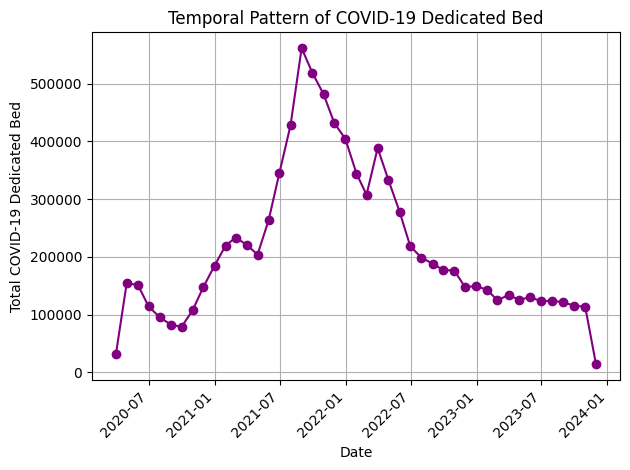

In [83]:
monthly_bed_occupancy = df.resample('M', on='date')['beds_covid'].sum()

plt.plot(monthly_bed_occupancy.index, monthly_bed_occupancy.values, marker='o', color='purple')
plt.xlabel('Date')
plt.ylabel('Total COVID-19 Dedicated Bed')
plt.title('Temporal Pattern of COVID-19 Dedicated Bed')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

plt.show()

**Answer:** The trend in COVID-19 dedicated beds initially showed a low count, gradually increasing and reaching its peak post-July 2021. After that, there was a decline in the number of beds.

##Inferences and Conclusion

From the analysis above, we can observe that bigger city has the higher amount of Covid-19 cases. For instance, Selangor and Johor are big cities and they have the highest number of Covid-19 cases.



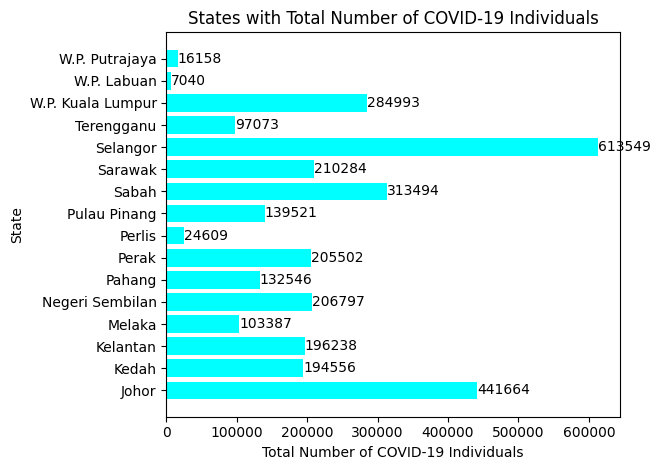

In [84]:
state_hosp = df.groupby('state')['hosp_covid'].sum()

bars = plt.barh(state_hosp.index, state_hosp.values, color='cyan')
plt.xlabel('Total Number of COVID-19 Individuals')
plt.ylabel('State')
plt.title('States with Total Number of COVID-19 Individuals')
plt.tight_layout()

for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval), va='center', ha='left')

plt.show()

Besides that, we can also conclude that the higher the number of cases, the higher number of beds in hospital.

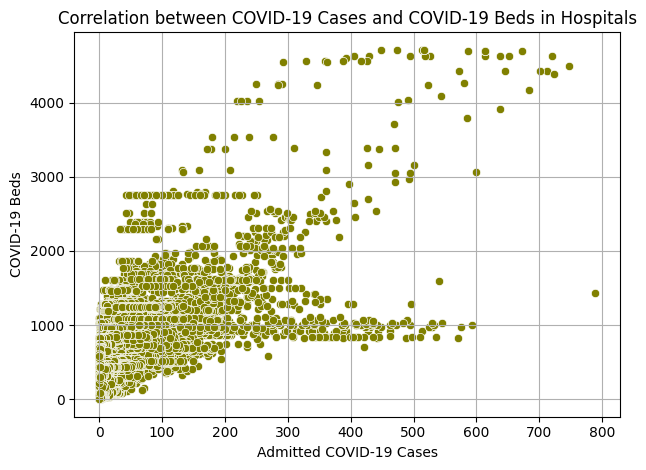

In [88]:
sns.scatterplot(x='admitted_covid', y='beds_covid', data=df, color='olive')
plt.xlabel('Admitted COVID-19 Cases')
plt.ylabel('COVID-19 Beds')
plt.title('Correlation between COVID-19 Cases and COVID-19 Beds in Hospitals')
plt.grid(True)
plt.tight_layout()

plt.show()


During the start of Covid-19, Malaysia implements lockdown for the whole country. The people have less contact with others therefore the cases is low. After Malaysia starts to loosen the lockdown control, the cases gradually increases until it reach the peak. The cases starts to decrease after the vaccine for Covid-19 is vaccinated to most of the Malaysian.

The beds dedicated for Covid-19 patients also gradually increases then the number of Covid-19 cases increases.

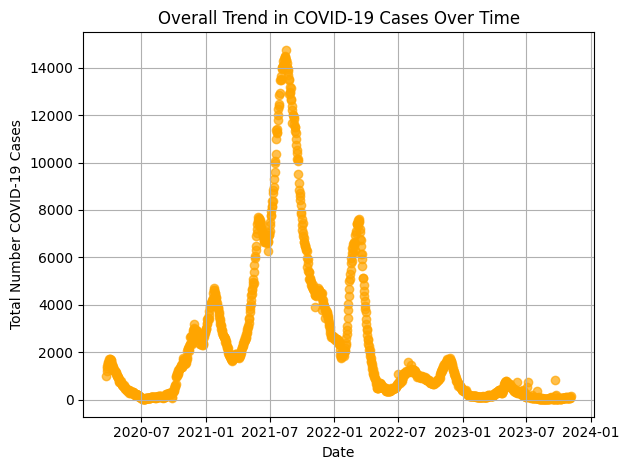

In [91]:
total_admitted_cases_over_time = df.groupby([df['date'].dt.year, df['date'].dt.month])['hosp_covid'].sum()

total_admitted_cases_over_time = df.groupby('date')['hosp_covid'].sum()

plt.scatter(total_admitted_cases_over_time.index, total_admitted_cases_over_time.values, color='orange', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Total Number COVID-19 Cases')
plt.title('Overall Trend in COVID-19 Cases Over Time')
plt.grid(True)
plt.tight_layout()

plt.show()

## References and Future Work

Future work on the same topic could use this analysis as a reference. Looking at more health information, not just Covid-19 cases, like existing health problems and other illnesses, could help us understand better how these things affect how bad Covid-19 is for people. This way, we can get a fuller picture of how the pandemic is affecting public health overall.

**Resources**

* [Exploratory Data Analysis](https://colab.research.google.com/drive/1E99RyuEAZM8j2dvoxRqV8oWpg3kjqfBg#scrollTo=dB_j6LtTTO5j)

* [Introduction to Exploratory Data Analysis](https://colab.research.google.com/drive/1DjKNfvPGkYyHQWpiEdyK4ozm-nXVa43D#scrollTo=nzh3zNvXEOOn)

* [Matplotlib](https://colab.research.google.com/drive/1Sk44p68l7wwrldwtZ_jpQ9-CTeDDcpTH)

* [Seaborn](https://colab.research.google.com/drive/1GWKtrW5GqZ8ifOh2deHLThxCpBE14A2c)

* [Python Pandas DataFrame](https://www.geeksforgeeks.org/python-pandas-dataframe/)
